"Asus TUF Gaming A15 FX506 15,6\" gaming computer (sort)": "9999\r", "MSI GF63 Thin 9SCXR-1252NE 15,6\" bærbar gaming computer (sort)": "4999\r", "HP Pavilion 15-ec1816no 15,6\" bærbar gaming computer": "7499", "Asus ROG Strix G153QR 15,6\" bærbar gaming computer (grå)": "15999", "Asus TUF Gaming A15 FX506 15,6\" bærbar gaming computer": "8499", "Asus TUF Gaming A17 FA706QM 17,3\" bærbar gaming computer (grå)": "11999", "Asus ZenBook Pro 15 UX535 15,6\" bærbar computer i7/16/512/1650Ti/FHD": "13499", "Asus TUF Gaming A17 FX706II-H7048T 17,3\" bærbar gaming computer (grå)": "7999", "Asus TUF Gaming A15 FA506 15,6\" bærbar computer R5/8/512/1660T": "7999"


<BarContainer object of 9 artists>

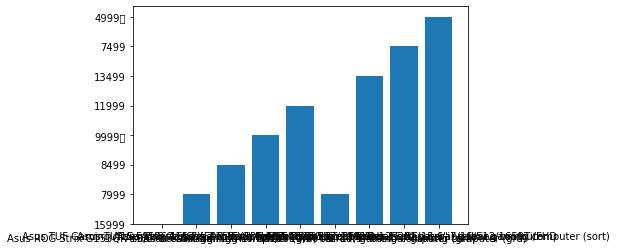

In [25]:
import bs4
import requests
import re
import matplotlib.pyplot as plt
import ast
import json

url = 'https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop'

r = requests.get(url)
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

event_cells = soup.find_all('div',{'class':'product-list-container'})
#print(event_cells[0])
title_array = []
price_array = []

for event_cell in event_cells:
    title = soup.find_all('a', {'class' :'product-name'})
    price = soup.find_all('div',{'class':'product-price'})
    for tag in title:
        title_array.append(tag.text.strip())
    for div in price:
        price_array.append(div.text.replace('\xa0','').strip()[:5])
        
zipped = dict(zip(title_array,price_array))


combined_string = json.dumps(zipped, ensure_ascii=False)


asuses = re.compile(r'\"Asus.*?\d{3}\"')

ass = asuses.findall(combined_string)

anus = ", ".join(ass)

print(anus)

anus_dict = ast.literal_eval("{"+anus+"}")
anus_dict = {k: v for k, v in sorted(anus_dict.items(), key=lambda item: item[0])}


plt.bar(anus_dict.keys(),anus_dict.values())
#plt.bar(zipped.keys(),zipped.values())



